In [5]:
%matplotlib inline
import pandas as pd
import cv2
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from Make_individual_video import make_mp4 # custom func

```
# ▶️ df1, video 저장 path를 입력으로 받고 
# 1️⃣ df1하위에 tmp 폴더를 생성 
# 2️⃣ 아이디별로 dir을 만듬 
# 3️⃣ 클립 이미지를 저장하는 함수
# ◀️ 리턴값은 생성된 폴더 list 와 path
clip_and_save()

# ▶️temp 폴더 path를 받고
# 1️⃣ temp폴더 하위에 아이디별로의 비디오를 만듬
# ◀️ video들의 path가 담긴 리스트
make_video(임시폴더 PATH)
```

In [6]:
def clip_and_save(df1:pd.DataFrame, imgs_path:str, out_path:str) -> str:
    nan_cnt = 0
    plt.figure(figsize=(10,10))
    
    for idx, r in df1.iterrows():
        
        # np nan check
        if np.isnan(r["track_id"]): # np의 nan은 이런 방식으로 처리해야 함
            nan_cnt+=1
            continue
    
        # read img
        img = cv2.imread(osp.join(imgs_path, r['filename']), cv2.IMREAD_UNCHANGED)

        # clip bbox
        id = str(int(r["track_id"]))
        ymin = int(r["track_body_ymin"])
        ymax = int(r["track_body_ymax"])
        xmin = int(r["track_body_xmin"])
        xmax = int(r["track_body_xmax"])
        img = img[int(r["track_body_ymin"]):int(r["track_body_ymax"]), int(r["track_body_xmin"]):int(r["track_body_xmax"]), :] # h*w*c

        # make dir
        save_dir_path = osp.join(out_path, id)
        os.makedirs(save_dir_path, exist_ok=True)
        
        # save clip img
        clipped_img_save_path = osp.join(save_dir_path, f"{id}_{str(r['frame'])}.jpg")
        cv2.imwrite(clipped_img_save_path, img)
    
    # print num of nan
    # print(nan_cnt)

    # for check last img
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # BRG2RGB and show
    
    return out_path, os.listdir(out_path)

In [7]:
CSV_PATH = '/opt/ml/del_under3sec_id.csv'
IMG_FILE_DIR_PATH = '/opt/ml/data/20230121_1428'
OUT_DIR = "/opt/ml/csv2video/del_under3sec_id"
df1 = pd.read_csv(CSV_PATH, index_col=0)

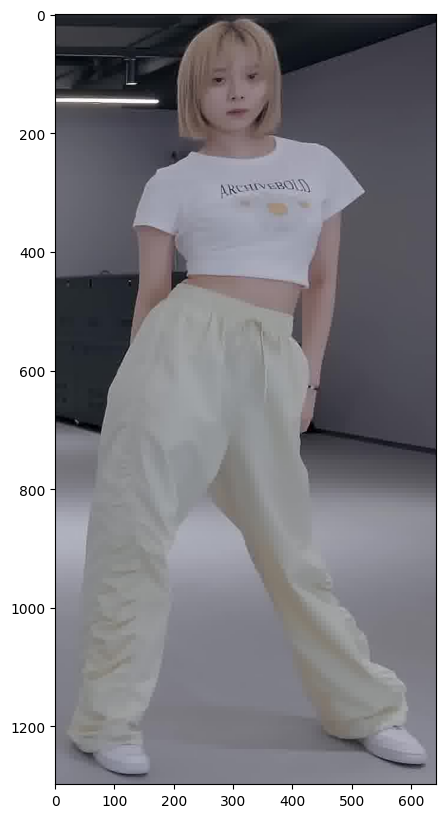

In [8]:
path, dirs = clip_and_save(df1, IMG_FILE_DIR_PATH, OUT_DIR)

In [9]:
make_mp4(target_dir=path, output_dir=path)

  0%|          | 0/19 [00:00<?, ?it/s]

/opt/ml/csv2video/del_under3sec_id/8


  5%|▌         | 1/19 [00:53<15:58, 53.26s/it]

/opt/ml/csv2video/del_under3sec_id/48


 11%|█         | 2/19 [01:43<14:33, 51.38s/it]

/opt/ml/csv2video/del_under3sec_id/53


 16%|█▌        | 3/19 [02:48<15:24, 57.77s/it]

/opt/ml/csv2video/del_under3sec_id/3


 21%|██        | 4/19 [02:53<09:15, 37.00s/it]

/opt/ml/csv2video/del_under3sec_id/0


 26%|██▋       | 5/19 [03:00<06:03, 25.97s/it]

/opt/ml/csv2video/del_under3sec_id/43


 32%|███▏      | 6/19 [03:12<04:37, 21.32s/it]

/opt/ml/csv2video/del_under3sec_id/34


 37%|███▋      | 7/19 [04:55<09:36, 48.02s/it]

/opt/ml/csv2video/del_under3sec_id/32


 42%|████▏     | 8/19 [06:31<11:34, 63.16s/it]

/opt/ml/csv2video/del_under3sec_id/27


 47%|████▋     | 9/19 [07:11<09:20, 56.05s/it]

/opt/ml/csv2video/del_under3sec_id/19


 53%|█████▎    | 10/19 [07:54<07:49, 52.15s/it]

/opt/ml/csv2video/del_under3sec_id/62


 58%|█████▊    | 11/19 [07:59<04:59, 37.47s/it]

/opt/ml/csv2video/del_under3sec_id/1


 63%|██████▎   | 12/19 [08:04<03:14, 27.77s/it]

/opt/ml/csv2video/del_under3sec_id/14


 68%|██████▊   | 13/19 [08:52<03:23, 33.91s/it]

/opt/ml/csv2video/del_under3sec_id/4


 74%|███████▎  | 14/19 [09:22<02:42, 32.52s/it]

/opt/ml/csv2video/del_under3sec_id/2


 79%|███████▉  | 15/19 [09:34<01:45, 26.45s/it]

/opt/ml/csv2video/del_under3sec_id/26


 84%|████████▍ | 16/19 [10:38<01:53, 37.72s/it]

/opt/ml/csv2video/del_under3sec_id/25


 89%|████████▉ | 17/19 [10:43<00:55, 27.80s/it]

/opt/ml/csv2video/del_under3sec_id/5


 95%|█████████▍| 18/19 [12:15<00:47, 47.31s/it]

/opt/ml/csv2video/del_under3sec_id/12


100%|██████████| 19/19 [12:28<00:00, 39.40s/it]


In [10]:
""" temp.csv
,a,b,c,d
0,,2,3,4
1,1,,3,4
"""

df2 = pd.read_csv('/opt/ml/temp.csv', index_col=0)
print(df2)
print("-"*20)
for idx, r in df2.iterrows():
    print(np.isnan(r['a']))

     a    b  c  d
0  NaN  2.0  3  4
1  1.0  NaN  3  4
--------------------
True
False
